In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

from sklearn                 import model_selection

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 'Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


***Altering the experience column***

In [7]:
data['Experience'] = np.abs(data['Experience'])

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


***2.	Study the data distribution in each attribute, share your findings***

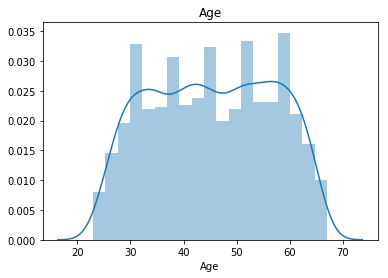

In [9]:
sns.distplot(data.Age)
plt.title('Age')
plt.show()

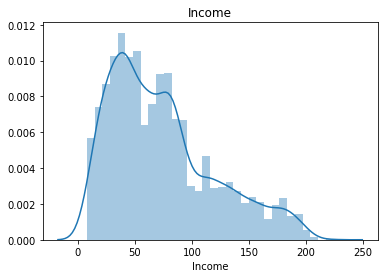

In [10]:
sns.distplot(data.Income)
plt.title('Income')
plt.show()

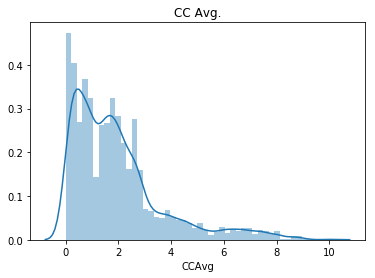

In [11]:
sns.distplot(data.CCAvg)
plt.title('CC Avg.')
plt.show()

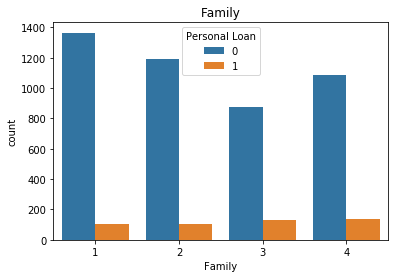

In [12]:
sns.countplot(data.Family, hue = data['Personal Loan'])
plt.title('Family')
plt.show()

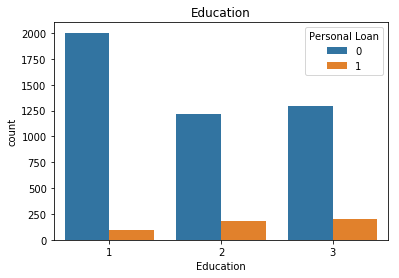

In [13]:
sns.countplot(data.Education, hue = data['Personal Loan'])
plt.title('Education')
plt.show()

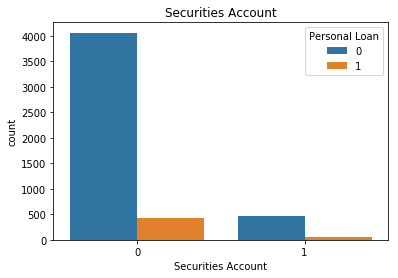

In [14]:
sns.countplot(data['Securities Account'], hue = data['Personal Loan'])
plt.title('Securities Account')
plt.show()

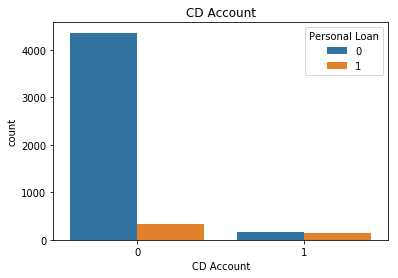

In [15]:
sns.countplot(data['CD Account'], hue = data['Personal Loan'])
plt.title('CD Account')
plt.show()

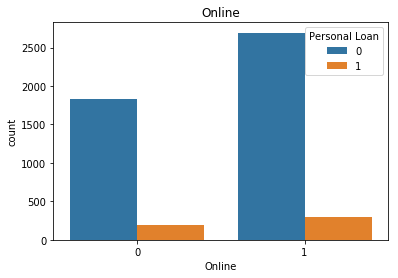

In [16]:
sns.countplot(data.Online, hue = data['Personal Loan'])
plt.title('Online')
plt.show()

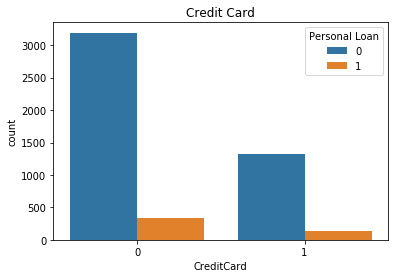

In [17]:
sns.countplot(data.CreditCard, hue = data['Personal Loan'])
plt.title('Credit Card')
plt.show()

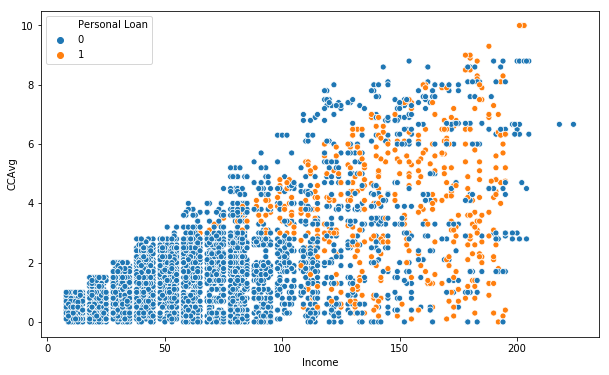

In [18]:
fig,axes = plt.subplots(figsize = (10,6))
sns.scatterplot('Income','CCAvg',data=data, hue = 'Personal Loan')
plt.show()

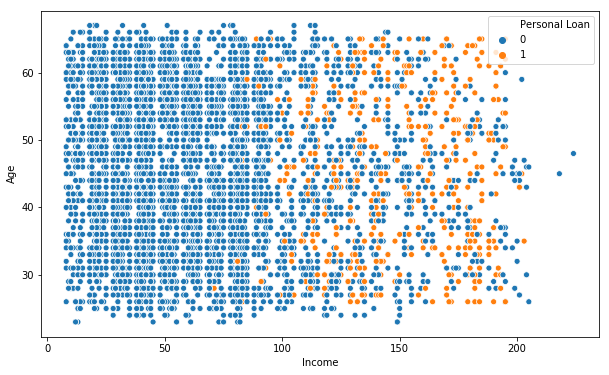

In [19]:
fig,axes = plt.subplots(figsize = (10,6))
sns.scatterplot('Income','Age',data=data, hue = 'Personal Loan')
plt.show()

***3.	Get the target column distribution. Your comments.***

0    4520
1     480
Name: Personal Loan, dtype: int64


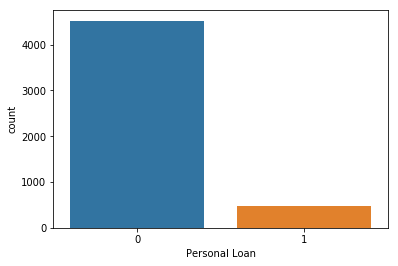

In [20]:
# Personal Loan Column
print(data['Personal Loan'].value_counts())
sns.countplot(data['Personal Loan'])
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors = 5, random_state=1)

data.drop(['ID'], axis=1, inplace = True)
x = data.drop(['Personal Loan'], axis = 1)
y = data['Personal Loan']

x ,y = sm.fit_sample(x, y)

***4.	Split the data into training and test set in the ratio of 70:30 respectively.***

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.transform(x_test)

***5.	Use a classification model to predict the likelihood of a liability customer buying personal loans.***

In [23]:
# here I have used 4 classification models

from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.neighbors    import KNeighborsClassifier

log_reg  = LogisticRegression()
dtcl     = DecisionTreeClassifier()
nbcl     = GaussianNB()
KNNcl    = KNeighborsClassifier()

# Logistic Regression Model

print('\n\nLogistic Regressor')
log_reg.fit(x_train, y_train)
print('Training     : ',log_reg.score(x_train,y_train))
print('Testing      : ',log_reg.score(x_test,y_test))

# Decision Tree Classifier Model

print('\n\nDecision Tree Classifier')
dtcl.fit(x_train, y_train)
print('Training     : ',dtcl.score(x_train, y_train))
print('Testing      : ',dtcl.score(x_test,y_test))

# GaussianNB Model

print('\n\nGaussianNB Accuracy Score')
nbcl.fit(x_train, y_train)
print('Training     : ',nbcl.score(x_train, y_train))
print('Testing      : ',nbcl.score(x_test, y_test))

# KNN Classifier Model

print('\n\nKNN Classifier Accuracy Score')
KNNcl.fit(X_train, y_train)
print('Training     : ',KNNcl.score(X_train, y_train))  #for models based on distance, scaling is must
print('Testing      : ',KNNcl.score(X_test, y_test))



Logistic Regressor
Training     :  0.9105562579013906
Testing      :  0.9107669616519174


Decision Tree Classifier
Training     :  1.0
Testing      :  0.9845132743362832


GaussianNB Accuracy Score
Training     :  0.8789506953223767
Testing      :  0.8768436578171092


KNN Classifier Accuracy Score
Training     :  0.9871997471554994
Testing      :  0.9745575221238938


In [24]:
models = []
models.append(('LogisticRegression         ', log_reg))
models.append(('DecisionTreeClassifier     ', dtcl))
models.append(('NaiveBayes                 ', nbcl))
models.append(('KNeighborsClassifier       ', KNNcl))
print(models)

[('LogisticRegression         ', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('DecisionTreeClassifier     ', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('NaiveBayes                 ', GaussianNB(priors=None, var_smoothing=1e-09)), ('KNeighborsClassifier       ', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]


LogisticRegression         : Accuracy Mean = 0.830752  &  Accuracy Standard Deviation = 0.026482
DecisionTreeClassifier     : Accuracy Mean = 0.983739  &  Accuracy Standard Deviation = 0.006512
NaiveBayes                 : Accuracy Mean = 0.861062  &  Accuracy Standard Deviation = 0.020934
KNeighborsClassifier       : Accuracy Mean = 0.897898  &  Accuracy Standard Deviation = 0.054645


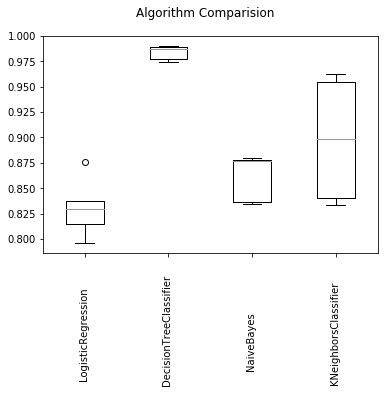

In [25]:
# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=1)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: Accuracy Mean = %f  &  Accuracy Standard Deviation = %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot for comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

***6.	Explain why you chose one model over the other (do not use ensemble techniques yet).***

***7.	Use ensemble techniques to improve the performance.***

In [26]:
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import BaggingClassifier
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.ensemble        import VotingClassifier
from sklearn.model_selection import cross_val_score

from scipy.stats             import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [27]:
rfcl = RandomForestClassifier()
bgcl = BaggingClassifier()
gbcl = GradientBoostingClassifier()

In [28]:
# Random Forest Classifier
# specify parameters and distributions to sample from
param_rf = {"max_depth": sp_randint(1,100),
              "max_features": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
samples = 100  # number of random samples 
rs_rf = RandomizedSearchCV(rfcl, param_distributions=param_rf, n_iter=samples, cv = 3) #default cv = 3
rs_rf.fit(x, y)
print('RF : ', rs_rf.best_params_)


# Bagging Classifier
# specify parameters and distributions to sample from
param_bg = {"n_estimators": sp_randint(1,100)}

# run randomized search
samples = 100  # number of random samples 
rs_bg = RandomizedSearchCV(bgcl, param_distributions=param_bg, n_iter=samples, cv = 3) #default cv = 3
rs_bg.fit(x, y)
print('BG : ', rs_bg.best_params_)


# Gradient Boosting Classifier
# specify parameters and distributions to sample from
param_gb = {"n_estimators": sp_randint(1,100)}

# run randomized search
samples = 100  # number of random samples 
rs_gb = RandomizedSearchCV(gbcl, param_distributions=param_gb, n_iter=samples, cv = 3) #default cv = 3
rs_gb.fit(x, y)
print('GB : ', rs_gb.best_params_)

RF :  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 54, 'max_features': 9, 'min_samples_leaf': 1}
BG :  {'n_estimators': 87}
GB :  {'n_estimators': 69}


In [29]:
rfcln = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=54, max_features=9, min_samples_leaf=1)
bgcln = BaggingClassifier(n_estimators=87)
gbcln = GradientBoostingClassifier(n_estimators=69)
enclf = VotingClassifier(estimators = [('lor', log_reg), ('dt', dtcl), ('nb', nbcl), ('KNN', KNNcl), 
                    ('rf', rfcln), ('bg', bgcln), ('gb', gbcln)], voting = 'hard') # using all models in the hybrid model

In [30]:
# Random Forest Classifier Model

print('\nRandom Forest Classifier')
rfcln.fit(x_train, y_train)
print('Training   : ',rfcln.score(x_train, y_train))
print('Testing    : ',rfcln.score(x_test, y_test))

# Bagging Classifier Model

print('\nBagging Classifier')
bgcln.fit(x_train, y_train)
print('Training   : ',bgcln.score(x_train, y_train))
print('Testing    : ',bgcln.score(x_test, y_test))

# Gradient Boosting Classifier Model

print('\nGradient Boosting Classifier')
gbcln.fit(x_train, y_train)
print('Training   : ',gbcln.score(x_train, y_train))
print('Testing    : ',gbcln.score(x_test, y_test))


Random Forest Classifier
Training   :  1.0
Testing    :  0.9874631268436578

Bagging Classifier
Training   :  0.9998419721871049
Testing    :  0.987094395280236

Gradient Boosting Classifier
Training   :  0.993046776232617
Testing    :  0.9878318584070797


In [31]:
for clf, label in zip([rfcln, bgcln, gbcln,enclf], ['RandomForest', 'Bagging', 'GradientBoosting', 'Ensembled(Hybrid)']):
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.99 (+/- 0.01) [RandomForest]
Accuracy: 0.99 (+/- 0.01) [Bagging]
Accuracy: 0.99 (+/- 0.01) [GradientBoosting]
Accuracy: 0.99 (+/- 0.01) [Ensembled(Hybrid)]


In [32]:
modelsn = []
modelsn.append(('RandomForestClassifier         ', rfcln))
modelsn.append(('BaggingClassifier              ', bgcln))
modelsn.append(('GradientBoostingClassifier     ', gbcln))
modelsn.append(('Hybrid Model                   ', enclf))
print(modelsn)

[('RandomForestClassifier         ', RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=54, max_features=9,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)), ('BaggingClassifier              ', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=87, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)), ('GradientBoostingClassifier     ', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_im

RandomForestClassifier         : Accuracy Mean = 0.989934  &  Accuracy Standard Deviation = 0.003097
BaggingClassifier              : Accuracy Mean = 0.988385  &  Accuracy Standard Deviation = 0.004574
GradientBoostingClassifier     : Accuracy Mean = 0.986615  &  Accuracy Standard Deviation = 0.004865
Hybrid Model                   : Accuracy Mean = 0.989270  &  Accuracy Standard Deviation = 0.003021


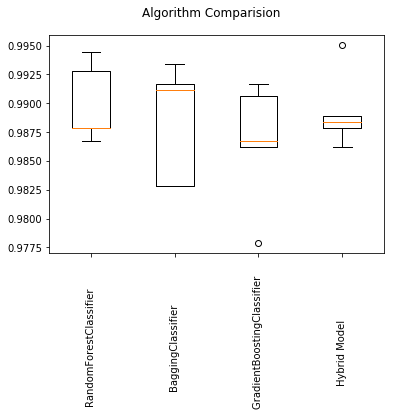

In [33]:
# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name,model in modelsn:
    kfold = model_selection.KFold(n_splits=5, random_state=1)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: Accuracy Mean = %f  &  Accuracy Standard Deviation = %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot for comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

In [39]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
data_os = pd.concat((x,y), axis=1)

In [40]:
from sklearn.utils import resample

values = np.asarray(data_os, dtype='float64')



# configure bootstrap
n_iterations = 100       # Number of bootstrap samples to create
n_size = int(len(values) * 0.5)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
# RandomForest Model
stats_rf = list()
for i in range(n_iterations):
    train = resample(values, n_samples = 500)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    rfcln.fit(train[:,:-1], train[:,-1])
    score_rf = rfcln.score(test[:,:-1], test[:,-1])
    stats_rf.append(score_rf)
    

# BaggingClassifier Model
stats_bg = list()
for i in range(n_iterations):
    bgcln.fit(train[:,:-1], train[:,-1])
    score_bg = bgcln.score(test[:,:-1], test[:,-1])
    stats_bg.append(score_bg)
    

# GradientBoostingClassifier Model
stats_gb = list()
for i in range(n_iterations):
    gbcln.fit(train[:,:-1], train[:,-1])
    score_gb = gbcln.score(test[:,:-1], test[:,-1])
    stats_gb.append(score_gb)
    
    
# HybridEnsemble Model
stats_hybrid = list()
for i in range(n_iterations):
    enclf.fit(train[:,:-1], train[:,-1])
    score_hybrid = enclf.score(test[:,:-1], test[:,-1])
    stats_hybrid.append(score_hybrid)


CI for RandomForest Model


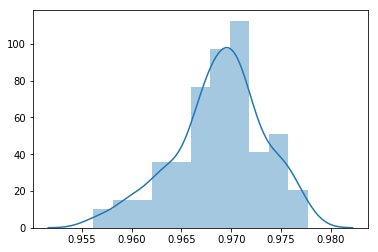

95.0 confidence interval 95.91% and 97.64%

CI for BaggingClassifier Model


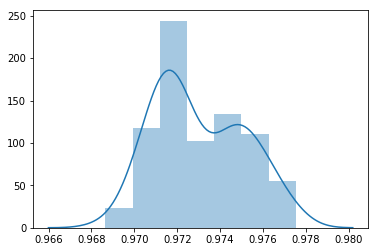

95.0 confidence interval 96.99% and 97.70%

CI for GradientBoosting Model


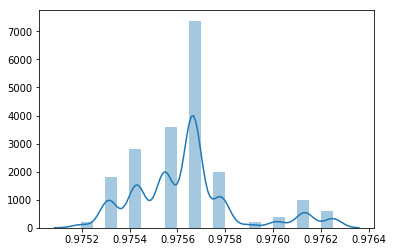

95.0 confidence interval 97.53% and 97.62%

CI for HybridEnsemble Model


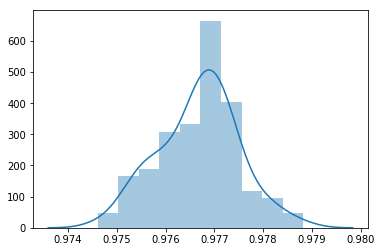

95.0 confidence interval 97.51% and 97.82%


In [41]:
# plot scores
# RandomForestClassifier
print('\nCI for RandomForest Model')
sns.distplot(stats_rf)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_rf, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_rf, p))
print('%.1f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

# BaggingClassifier
print('\nCI for BaggingClassifier Model')
sns.distplot(stats_bg)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_bg, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_bg, p))
print('%.1f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

# GradientBoosting Classifier
print('\nCI for GradientBoosting Model')
sns.distplot(stats_gb)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_gb, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_gb, p))
print('%.1f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

# KHybridEnsemble Model
print('\nCI for HybridEnsemble Model')
sns.distplot(stats_hybrid)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_hybrid, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_hybrid, p))
print('%.1f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

